In [1]:
#load the data
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory('./dataset/training_set',target_size=(50,50),batch_size=32,class_mode='binary')


Found 8000 images belonging to 2 classes.


In [2]:
#确认输入数据标签
training_set.class_indices

{'cats': 0, 'dogs': 1}

In [3]:
#set up the cnn model
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense

model = Sequential()
#卷积层
model.add(Conv2D(32,(3,3),input_shape=(50,50,3),activation='relu'))
#池化层
model.add(MaxPool2D(pool_size=(2,2)))
#卷积层
model.add(Conv2D(32,(3,3),activation='relu'))
#池化层
model.add(MaxPool2D(pool_size=(2,2)))
#flattening layer
model.add(Flatten())
#FC layer
model.add(Dense(units=128,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))

In [4]:
#configure the model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model.summary()

In [ ]:
#train the model
model.fit_generator(training_set,epochs=20)

In [7]:
#accuracy on the training data
accuracy_train = model.evaluate_generator(training_set)
print(accuracy_train)

C:\Users\Administrator\AppData\Local\Temp\2\ipykernel_8220\2929107028.py:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  accuracy_train = model.evaluate_generator(training_set)


[0.00598079152405262, 0.999625027179718]


In [8]:
#accuracy on the test data
test_set = train_datagen.flow_from_directory('./dataset/test_set',target_size=(50,50),batch_size=32,class_mode='binary')

accuracy_test = model.evaluate_generator(test_set)
print(accuracy_test)

Found 2000 images belonging to 2 classes.


C:\Users\Administrator\AppData\Local\Temp\2\ipykernel_8220\877899612.py:4: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  accuracy_test = model.evaluate_generator(test_set)


[1.4676562547683716, 0.7595000267028809]


In [12]:
#load single image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
pic_dog = 'dog.jpg'
pic_dog = load_img(pic_dog,target_size=(50,50))
pic_dog = img_to_array(pic_dog)
pic_dog = pic_dog/255
pic_dog = pic_dog.reshape(1,50,50,3)
result = (model.predict(pic_dog)>0.5).astype("int32")
print(result)

1/1 [==============================] - 0s 103ms/step
[[1]]


In [13]:
pic_cat = 'cat1.jpg'
pic_cat = load_img(pic_cat,target_size=(50,50))
pic_cat = img_to_array(pic_cat)
pic_cat = pic_cat/255
pic_cat = pic_cat.reshape(1,50,50,3)
result = (model.predict(pic_cat)>0.5).astype("int32")
print(result)

1/1 [==============================] - 0s 21ms/step
[[0]]


In [14]:
training_set.class_indices

{'cats': 0, 'dogs': 1}

1/1 [==============================] - 0s 21ms/step


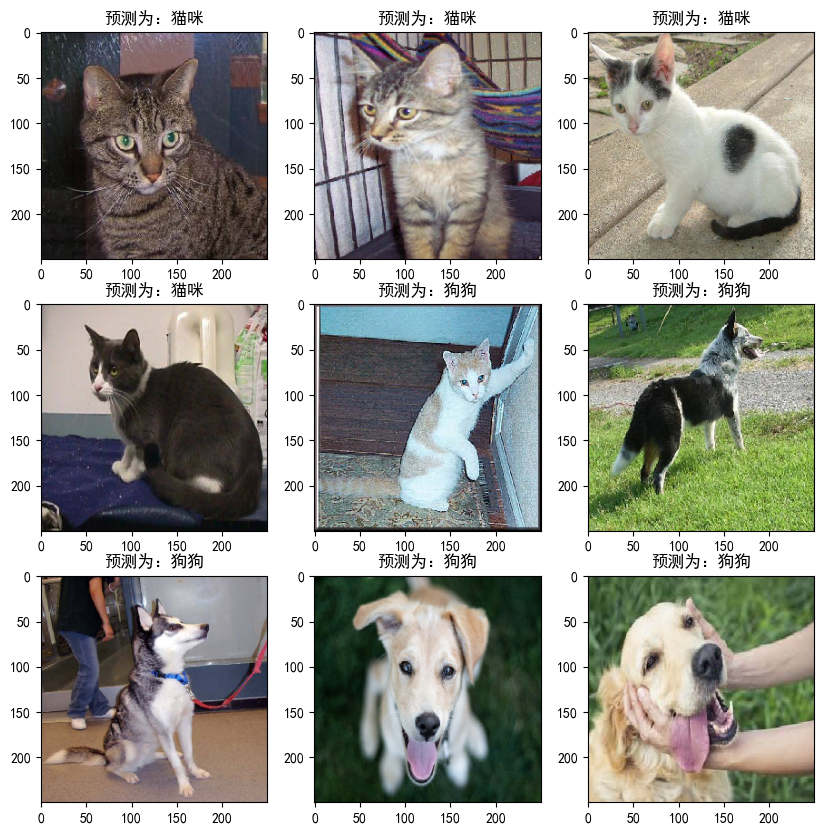

In [16]:
# make prediction on multiple images
import matplotlib as mlp
font2 = {'family' : 'SimHei',
'weight' : 'normal',
'size'   : 20,
}
mlp.rcParams['font.family'] = 'SimHei'
mlp.rcParams['axes.unicode_minus'] = False
from matplotlib import pyplot as plt
from matplotlib.image import imread
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
a = [i for i in range(1,10)]
fig = plt.figure(figsize=(10,10))
for i in a:
    img_name = str(i)+'.jpg'
    img_ori = load_img(img_name, target_size=(50, 50))
    img = img_to_array(img_ori)
    img = img.astype('float32')/255
    img = img.reshape(1,50,50,3)
    result = (model.predict(img)>0.5).astype("int32")
    img_ori = load_img(img_name, target_size=(250, 250))
    plt.subplot(3,3,i)
    plt.imshow(img_ori)
    plt.title('预测为：狗狗' if result[0][0] == 1 else '预测为：猫咪')
plt.show()